In [3]:
import json
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
source='new 2.json'

In [4]:
np.__version__

'1.13.3'

In [5]:
fvt_count=[]
ret_count=[]
texts=[]
date_creation=[]
cmp_scr=[]
sources=[]
with open(source, encoding='UTF-8') as datafile:
    sample_data=json.load(datafile)
    for tweet in sample_data:
        date=tweet['created_at']
        text=tweet['text']
        source=tweet['source']
        fvt=tweet['favorite_count']
        ret=tweet['retweet_count']
        
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        
      
        
        fvt_count.append(fvt)
        ret_count.append(ret)
        texts.append(text)
        cmp_scr.append(compound)
        date_creation.append(date)
        sources.append(source)

In [6]:
print(len(texts))

33354


In [7]:
Trump_df=pd.DataFrame({'Date':date_creation,'Tweet':texts,'Compound Score':cmp_scr,'Favorite Counts':fvt_count,
                      'Retweet Counts':ret_count,'Tweet Source':sources})
Trump_df.head()

,Compound Score,Date,Favorite Counts,Retweet Counts,Tweet,Tweet Source
0,0.9577,Tue Apr 10 18:30:38 +0000 2018,37017,8036,Very thankful for President Xi of China’s kind...,Twitter for iPhone
1,0.9577,Tue Apr 10 17:51:08 +0000 2018,24427,5869,Very thankful for President Xi of China’s kind...,Twitter for iPhone
2,0.9340,Tue Apr 10 13:30:35 +0000 2018,53867,12395,"Last night, it was my great honor to host Amer...",Twitter for iPhone
3,-0.5229,Tue Apr 10 11:08:18 +0000 2018,92881,24409,A TOTAL WITCH HUNT!!!,Twitter for iPhone
4,-0.4753,Tue Apr 10 11:07:58 +0000 2018,81975,22029,Attorney–client privilege is dead!,Twitter for iPhone


In [12]:
trump_apple=Trump_df[Trump_df['Tweet'].str.contains('Apple')]
trump_apple

,Compound Score,Date,Favorite Counts,Retweet Counts,Tweet,Tweet Source
485,0.9456,Wed Jan 17 23:28:30 +0000 2018,92540,24533,I promised that my policies would allow compan...,Twitter for iPhone
5967,0.4199,Wed Mar 30 21:35:14 +0000 2016,17001,6218,"Thank you- Appleton, Wisconsin!\n#WIPrimary #T...",Twitter for iPhone
6612,-0.7906,Fri Feb 19 21:38:07 +0000 2016,10640,4312,Boycott all Apple products until such time as...,Twitter for Android
6614,-0.6249,Fri Feb 19 21:32:43 +0000 2016,9586,3570,I use both iPhone &amp; Samsung. If Apple does...,Twitter Web Client
11017,0.6892,Thu Jun 25 03:07:11 +0000 2015,261,113,"""@MunichEleven: Baseball, Hotdogs, Apple Pie a...",Twitter for Android
16835,-0.5411,Thu Sep 25 20:35:11 +0000 2014,267,299,I’ll bet if I didn’t harass Apple for the last...,Twitter Web Client
17089,0.5093,Wed Sep 10 18:49:49 +0000 2014,150,133,"Flashback from October, 2013: “Donald Trump de...",Twitter Web Client
19675,0.7402,Tue Apr 01 13:30:05 +0000 2014,30,16,"""@DonNadeau Thank you so much for supporting a...",Twitter Web Client
19818,-0.3818,Mon Mar 24 14:18:20 +0000 2014,471,306,I wonder if Apple is upset with me for houndin...,Twitter Web Client
19956,0.8126,Sat Mar 08 09:37:09 +0000 2014,21,4,"""@stephinkycheese: @gjonesiv @StuartAppleby Ye...",Twitter for Android


In [13]:
for date in Trump_df['Date']:
    dt=datetime.datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y")
    

In [14]:
daily_dt=pd.to_datetime(trump_apple['Date']).dt.to_period('d')
monthly_dt=pd.to_datetime(trump_apple['Date']).dt.to_period('m')
yearly_dt=pd.to_datetime(trump_apple['Date']).dt.to_period('y')

In [15]:
trump_apple["Daily Date"]=daily_dt
trump_apple["Monthly Date"]=monthly_dt
trump_apple["Yearly Date"]=yearly_dt

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [16]:
sort=trump_apple.sort_values('Compound Score', ascending= True)
sort.head(100
         )

,Compound Score,Date,Favorite Counts,Retweet Counts,Tweet,Tweet Source,Daily Date,Monthly Date,Yearly Date
23382,-0.8958,Thu Aug 01 12:25:37 +0000 2013,94,162,"When I jokingly said ""bring back Steve Jobs to...",Twitter for Android,2013-08-01,2013-08,2013
22204,-0.7925,Thu Sep 19 09:50:57 +0000 2013,459,900,I cannot believe that Apple didn't come out wi...,Twitter for Android,2013-09-19,2013-09,2013
6612,-0.7906,Fri Feb 19 21:38:07 +0000 2016,10640,4312,Boycott all Apple products until such time as...,Twitter for Android,2016-02-19,2016-02,2016
26336,-0.7717,Tue Apr 02 20:40:41 +0000 2013,161,279,I think it was terrible that Tim Cook of Apple...,Twitter Web Client,2013-04-02,2013-04,2013
31232,-0.6908,Mon Jul 02 20:31:09 +0000 2012,9,80,China court: Apple pays $60M to settle iPad ca...,Twitter Web Client,2012-07-02,2012-07,2012
6614,-0.6249,Fri Feb 19 21:32:43 +0000 2016,9586,3570,I use both iPhone &amp; Samsung. If Apple does...,Twitter Web Client,2016-02-19,2016-02,2016
16835,-0.5411,Thu Sep 25 20:35:11 +0000 2014,267,299,I’ll bet if I didn’t harass Apple for the last...,Twitter Web Client,2014-09-25,2014-09,2014
20415,-0.4926,Tue Jan 28 12:23:23 +0000 2014,316,565,Steve Jobs is spinning in his grave - Apple ha...,Twitter for Android,2014-01-28,2014-01,2014
21786,-0.4912,Mon Oct 14 15:37:00 +0000 2013,82,158,"As an addition, Apple must go to a larger scre...",Twitter Web Client,2013-10-14,2013-10,2013
23526,-0.4188,Thu Jul 25 15:00:00 +0000 2013,4,9,"@MikeMcHale09 \n""@realDonaldTrump Wouldn'...",Twitter Web Client,2013-07-25,2013-07,2013


In [17]:
Daily_avg=trump_apple.groupby('Daily Date')['Compound Score'].mean()
Daily_dataframe=pd.DataFrame({'Daily Comp Score':Daily_avg})
Daily_dataframe.plot(kind='line',y='Daily Comp Score' ,linestyle='None', marker='o',figsize=(10,10))

In [19]:
Monthly_avg=trump_apple.groupby('Monthly Date')['Compound Score'].mean()
Monthly_dataframe=pd.DataFrame({'Monthly Comp Score':Monthly_avg})
Monthly_dataframe.plot(kind='line',y='Monthly Comp Score' ,linestyle='None', marker='o',figsize=(10,10))

In [20]:
# Create bins in which to place values based upon TED Talk views
bins = [-1.0,-0.5,0,0.5,1.0]

# Create labels for these bins
group_labels = ["Really Pessimistic","Mildy mad","having a nice day",
                "totally chilled"]
group= ['-1.0 to -0.5','-0.5 to 0.0','0.0 to 0.5','0.5 to 1.0']

In [21]:
Daily_dataframe['Comp Group']= pd.cut(Daily_dataframe["Daily Comp Score"],bins,labels=group)
d=Daily_dataframe.groupby('Comp Group').count()
d

,Daily Comp Score
Comp Group,
-1.0 to -0.5,5
-0.5 to 0.0,8
0.0 to 0.5,6
0.5 to 1.0,7


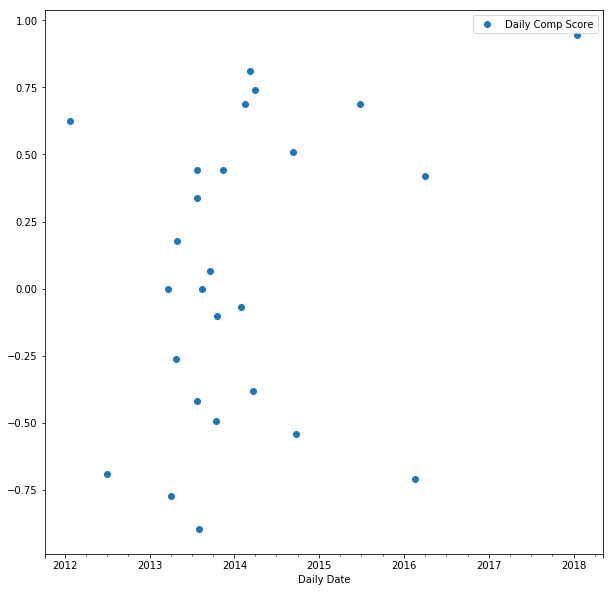

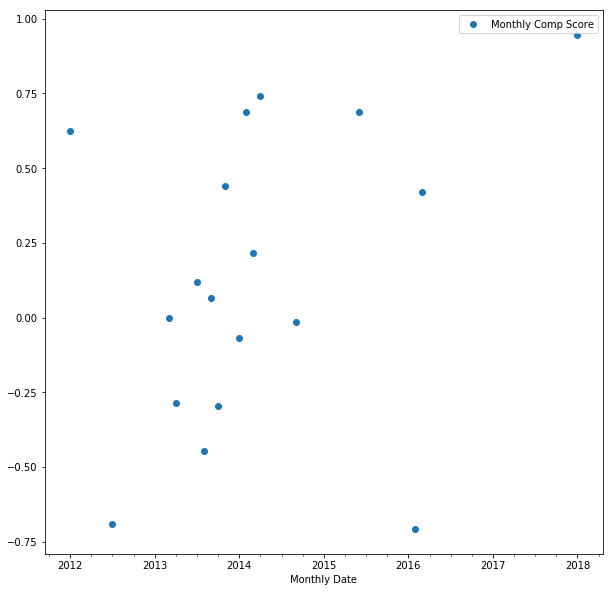

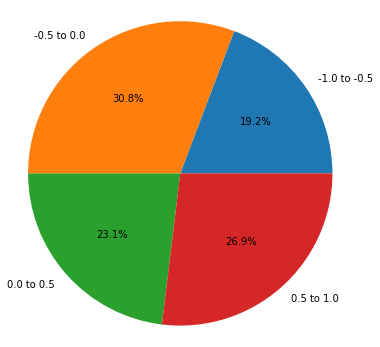

In [22]:
d.plot(kind='pie',y='Daily Comp Score', legend=None, autopct= '%1.1f%%', figsize=(6,6))
plt.axis('equal')
plt.ylabel('')
plt.show()
